Assignment 12

Load mall customer dataset and visualize it. Experiment with different values of eps (maximum distance for neighbors) and min_samples (minimum points to form a dense region). How do these parameters affect the number of clusters identified by DBSCAN? Identify and visualize the noise points (points labeled as -1 by DBSCAN). What happens to the noise points when eps is increased or decreased? Compare the clustering results based on silhouette scores or other metrics

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv(r"C:\Users\SASWATA\OneDrive\Desktop\ML_PRAC\ML_PRAC\Mall_Customers.csv")

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

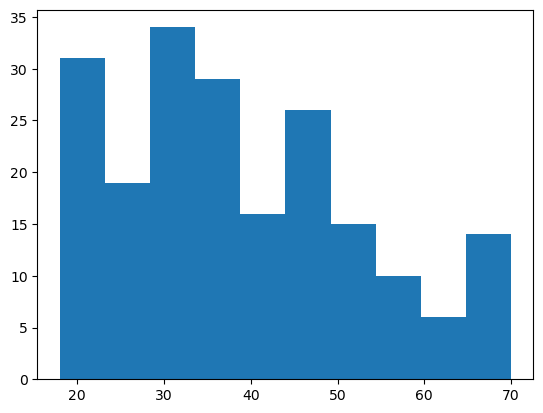

In [21]:
plt.hist(df['Age'])

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

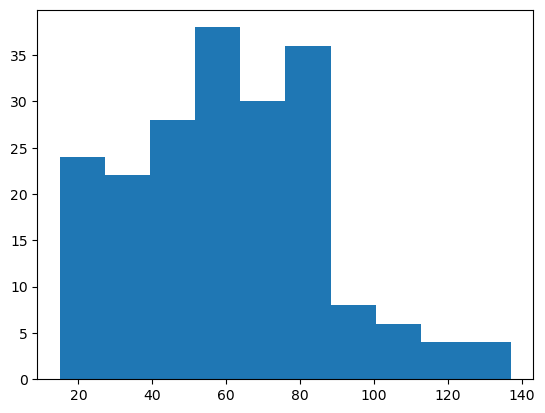

In [23]:
plt.hist(df['Annual Income (k$)'])

In [27]:
df=df.drop(['CustomerID'],axis=1)

In [29]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [35]:
df['Age']=scale.fit_transform(df[['Age']])

In [37]:
df['Annual Income (k$)']=scale.fit_transform(df[['Annual Income (k$)']])

In [39]:
df['Spending Score (1-100)']=scale.fit_transform(df[['Spending Score (1-100)']])

In [41]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,-1.424569,-1.738999,-0.434801
1,Male,-1.281035,-1.738999,1.195704
2,Female,-1.352802,-1.700830,-1.715913
3,Female,-1.137502,-1.700830,1.040418
4,Female,-0.563369,-1.662660,-0.395980


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

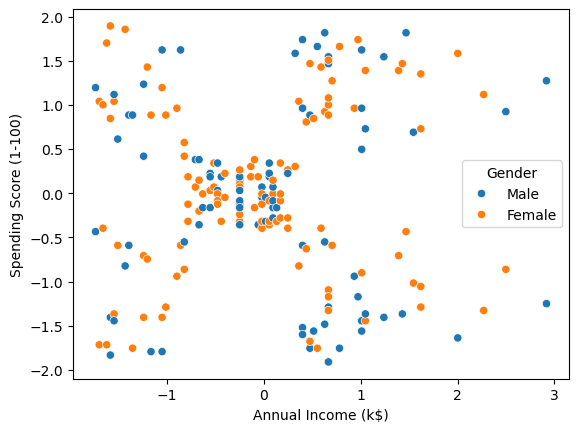

In [49]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['Gender'])

In [63]:
from sklearn.preprocessing import LabelEncoder

In [65]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [71]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

DBSCAN with eps=[0.5, 1.0, 1.5] and min_samples=[3, 5]


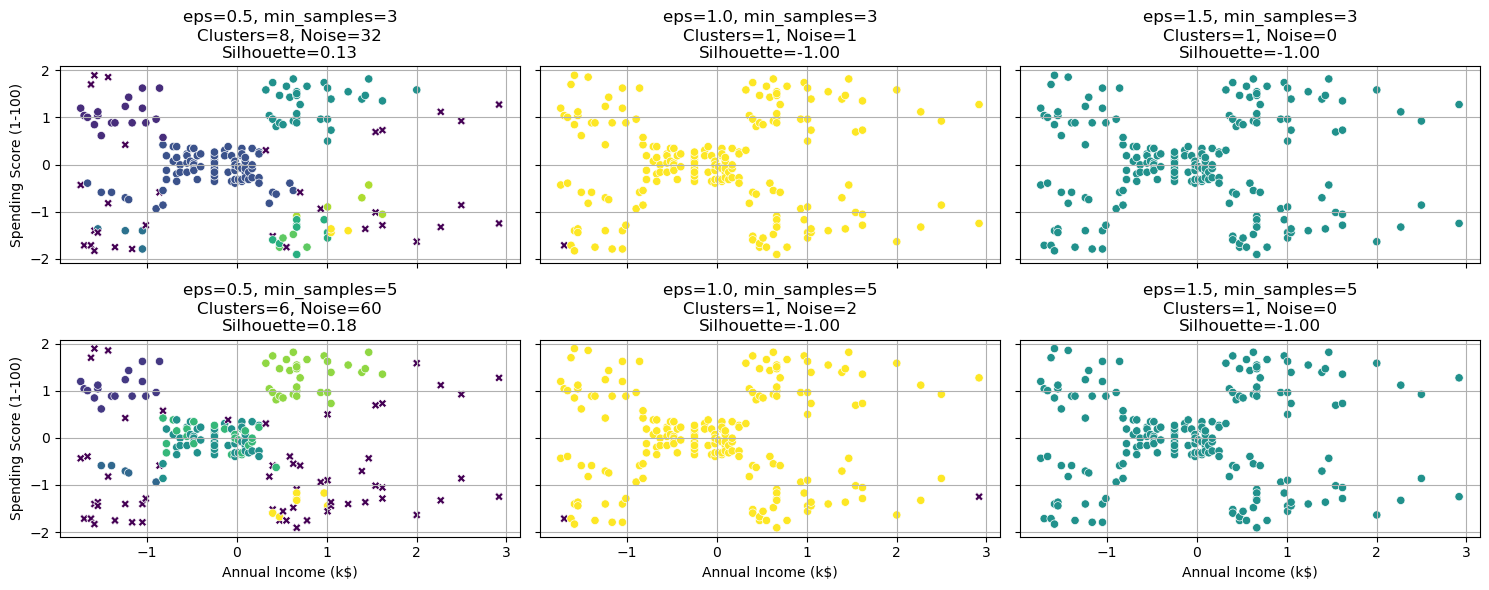

In [89]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to run DBSCAN and visualize results in a grid
def dbscan_clustering_grid(X_scaled, eps_values, min_samples_values):
    fig, axes = plt.subplots(len(min_samples_values), len(eps_values), figsize=(15, 6), sharey=True, sharex=True)

    for row, min_samples in enumerate(min_samples_values):
        for col, eps in enumerate(eps_values):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(X_scaled)
            noise_points = np.sum(clusters == -1)
            num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
            silhouette = silhouette_score(X_scaled, clusters) if num_clusters > 1 else -1

            # Visualize clusters
            sns.scatterplot(
                ax=axes[row, col],
                x=X['Annual Income (k$)'],
                y=X['Spending Score (1-100)'],
                hue=clusters,
                palette='viridis',
                style=clusters == -1,
                markers={True: 'X', False: 'o'},
                legend=False
            )
            axes[row, col].set_title(
                f'eps={eps}, min_samples={min_samples}\nClusters={num_clusters}, Noise={noise_points}\nSilhouette={silhouette:.2f}'
            )
            if row == len(min_samples_values) - 1:
                axes[row, col].set_xlabel('Annual Income (k$)')
            if col == 0:
                axes[row, col].set_ylabel('Spending Score (1-100)')
            axes[row, col].grid()

    plt.tight_layout()
    plt.show()

# Experiment with eps and min_samples
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [3, 5]
print(f"DBSCAN with eps={eps_values} and min_samples={min_samples_values}")
dbscan_clustering_grid(X_scaled, eps_values, min_samples_values)